<a href="https://colab.research.google.com/github/maamm14/maamm14_ZINDI_materials/blob/main/zindi_computer_vision_makerere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from IPython.display import Image as ShowImage

# Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

!unzip -q "/content/drive/MyDrive/Colab Notebooks/PICTURE/Images_3.zip" -d "/content/drive/MyDrive/train_images"

import os 
len(os.listdir('/content/drive/MyDrive/train_images'))

Mounted at /content/drive
replace /content/drive/MyDrive/train_images/id_0adud1myz8tvz.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


2699

In [3]:
df =pd.read_csv("/content/drive/MyDrive/Train (1).csv")
test_csv =pd.read_csv("/content/drive/MyDrive/Test (1).csv")
submission_csv =pd.read_csv('/content/drive/MyDrive/SampleSubmission (1).csv')

def rename_imageID(image_id):
  return r'/content/drive/MyDrive/train_images/' + image_id

df['Image_id'] = df['Image_id'].apply(rename_imageID)
test_csv['Image_id'] = test_csv['Image_id'].apply(rename_imageID)

# Changing label type to string...
df["Label"] = df['Label'].astype(str)

(df.shape[0] + test_csv.shape[0]) == len(os.listdir('/content/drive/MyDrive/train_images'))

True

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/train_images')))

2699


In [ ]:
print(len(df['Label']))

1619


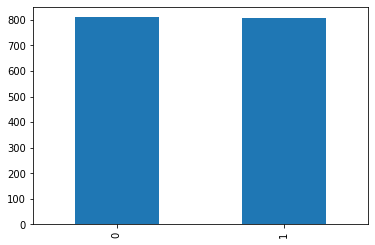

In [ ]:
df["Label"].value_counts().plot.bar()

In [ ]:
test_csv.head()

,Image_id
0,/content/drive/MyDrive/train_images/id_00exusb...
1,/content/drive/MyDrive/train_images/id_03dqinf...
2,/content/drive/MyDrive/train_images/id_046yl0c...
3,/content/drive/MyDrive/train_images/id_04athdt...
4,/content/drive/MyDrive/train_images/id_062aauf...


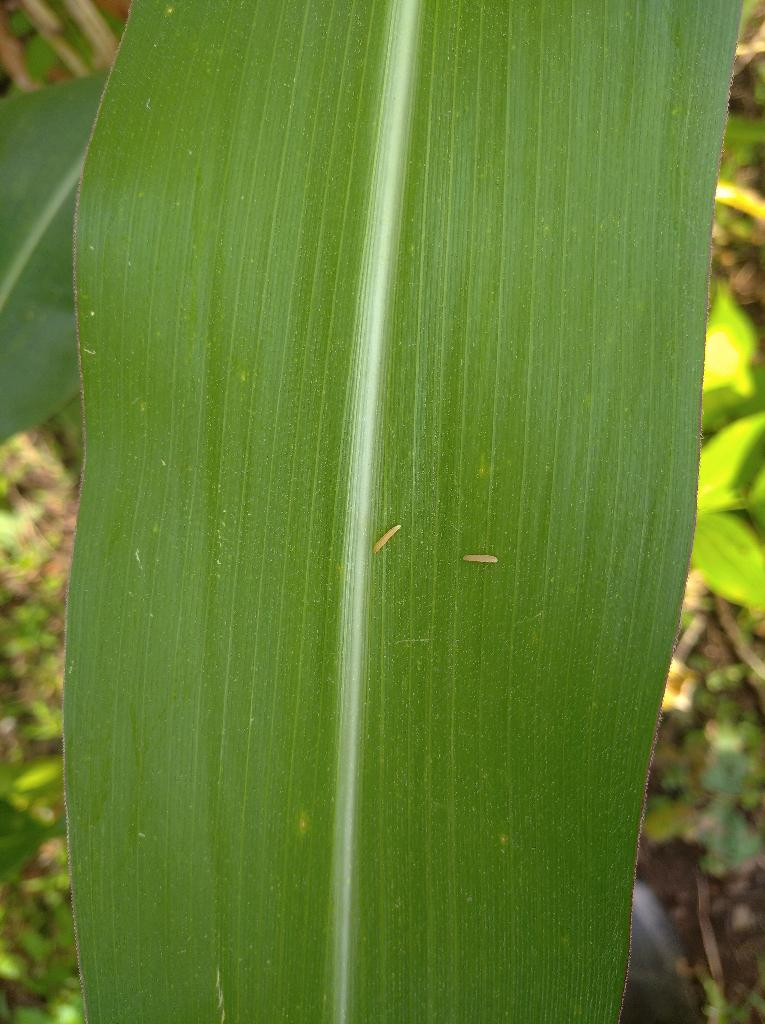

In [4]:
ShowImage("/content/drive/MyDrive/train_images/id_00exusbkgzw1b.jpg")

In [7]:
train, valid_test= train_test_split(df, test_size = .1,random_state=42)

img_datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',validation_split=0.1,rescale=1./255)
                               
                               
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
]

In [8]:
def plot_loss_and_accuracy(mo_fit):
    accuracy = mo_fit.history['acc']
    loss = mo_fit.history['loss']
    validation_loss = mo_fit.history['val_loss']
    validation_accuracy = mo_fit.history['val_acc']



    plt.figure(figsize=(20, 20))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(accuracy)), accuracy, label='Training Accuracy')
    plt.plot(range(len(accuracy)), validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.title('Accuracy : Training Vs Validation ')



    plt.subplot(2, 2, 2)
    plt.plot(range(len(accuracy)), loss, label='Training Loss')
    plt.plot(range(len(accuracy)), validation_loss, label='Validation Loss')
    plt.title('Loss : Training Vs Validation ')
    plt.legend(loc='upper right')
    plt.show()

CNN

Found 1312 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/15
132/132 [==============================] - 47s 268ms/step - loss: 0.6546 - acc: 0.6151 - val_loss: 0.5804 - val_acc: 0.6250
Epoch 2/15
132/132 [==============================] - 34s 255ms/step - loss: 0.4707 - acc: 0.7713
Epoch 3/15
132/132 [==============================] - 33s 252ms/step - loss: 0.3695 - acc: 0.8377
Epoch 4/15
132/132 [==============================] - 34s 255ms/step - loss: 0.3272 - acc: 0.8514
Epoch 5/15
132/132 [==============================] - 34s 258ms/step - loss: 0.2987 - acc: 0.8803
Epoch 6/15
132/132 [==============================] - 34s 257ms/step - loss: 0.2517 - acc: 0.9024
Epoch 7/15
132/132 [==============================] - 34s 257ms/step - loss: 0.2297 - acc: 0.9108
Epoch 8/15
132/132 [==============================] - 34s 255ms/step - loss: 0.2065 - acc: 0.9146
Epoch 9/15
132/132 [==============================] - 34s 256ms/step - loss: 0.1656 - acc: 0.9306
Epoch 10/15
132/132 [==============================] - 34s 256ms/step - loss: 0.1

ValueError: ignored

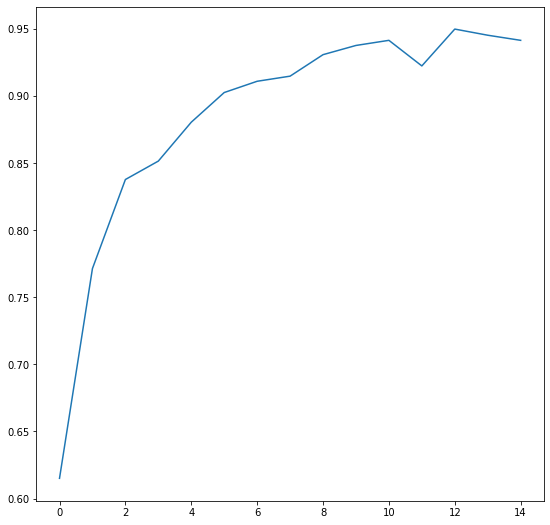

In [9]:
def cnn_model(dff, xxx_train, xxx_test, my_callbacks):
    
    x_train =  img_datagen.flow_from_dataframe(dataframe = xxx_train,  x_col='Image_id', y_col='Label',  class_mode='categorical',target_size=(224,224), shuffle=False, batch_size=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = xxx_test,  x_col='Image_id', y_col='Label',class_mode='categorical',  target_size=(224,224), shuffle=False, subset='validation')
    
    model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3), input_shape=(224,224,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(2, activation='softmax')
  ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

    model_history = model.fit_generator(generator = x_train, 
                   epochs = 15 ,
                   validation_data = x_test,
                   validation_steps = 100)

    return model_history

    
plot = plot_loss_and_accuracy(cnn_model(df, train, valid_test, my_callbacks))
del plot

In [10]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [11]:
def resnet_model(df, train, valid_test, my_callbacks):
    x_train =  img_datagen.flow_from_dataframe(dataframe = train,  x_col='Image_id', y_col='Label',  class_mode='categorical',target_size=(224,224), shuffle=True, batch_size=10, seed=10, subset='training')
    x_test = img_datagen.flow_from_dataframe(dataframe = valid_test,  x_col='Image_id', y_col='Label',class_mode='categorical',  target_size=(224,224), shuffle=False,seed=10, subset='validation')
    
    resnet_model=resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
    model=Sequential()
    model.add(resnet_model)
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(2,activation='softmax'))
    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
    
    
    model_history = model.fit(
    x_train,
    epochs=50,
    validation_data=x_test,
    callbacks=my_callbacks)
    
    
    return model_history
    
plot_loss_and_accuracy(resnet_model(df, train, valid_test, my_callbacks))

Found 1312 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
94781440/94765736 [==============================] - 0s 0us/step
Epoch 1/50
132/132 [==============================] - 50s 338ms/step - loss: 0.7309 - accuracy: 0.8864 - val_loss: 6.9884 - val_accuracy: 0.5625
Epoch 2/50
132/132 [==============================] - 42s 316ms/step - loss: 0.0796 - accuracy: 0.9733 - val_loss: 4.6845 - val_accuracy: 0.5625
Epoch 3/50
132/132 [==============================] - 42s 317ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 3.3436 - val_accuracy: 0.4375
Epoch 4/50
132/132 [==============================] - 42s 319ms/step - loss: 0.0569 - accuracy: 0.9802 - val_loss: 1.8648 - val_accuracy: 0.5000
Epoch 5/50
132/132 [==============================] - 42s 319ms/step - loss: 0.0233 - accuracy: 0.9939 - val_loss: 3.2220 - val_accuracy: 0.5625
Epoch 6/50
132/132 [==============================] - 43s 321ms/step - loss: 0.0528 - accu

KeyError: ignored